# **Laboratorio 11: Introducción al modelo de Regresión Lineal**

**Facultad de ingeniería**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2340** Fundamentos de Machine Learning.

**Nombres de los integrantes**


1.   Laura Julieth Carretero Serran
2.   Juan David Rios Nisperuza

**Número del grupo**

*3*


# **Introducción**
La regresión lineal busca encontrar los parámetros de una ecuación  que predice el valor de una variable  $y$ a partir de las variables en el vector $x$. Las variables en $x$ se conocen como predictores y los parámetros de la ecuación se denotan por $\beta$. La búsqueda de los parámetros de la ecuación, es decir, $\beta$, usualmente se realiza usando un conjunto de observaciones de estas variables. Este modelo se usa en múltiples campos y comprender su funcionamiento es fundamental en ingeniería.


Considere el conjunto de observaciones:

\begin{align*}
   \{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), ... , (x^{(m)},y^{(m)})\}.
 \end{align*}

Para este ejercicio, asumamos que la relación entre la variables $x$ y $y$ se define mediante la siguiente ecuación:

\begin{align*}
  y^* = g(x; \beta)=β_{0} + \beta_1 x,\\
\end{align*}

donde los $\beta_i$ son los coeficientes de la ecuación que deben ser encontrados a través la resolución de un problema de optimización. Dicho problema se denomina problema de *mínimos cuadrados*, el cual busca los valores de $\beta$ tales que se minimice la distancia al cuadrado entre los valores de $y^{(j)}$ (es decir, el valor de $y$ observado) y $g(x^{(j)};\beta)$ (es decir, el valor de $y$ estimado por la ecuación).  De forma matemática, el problema se formula como :

\begin{align*}
  \min_{\beta\in\mathbb{R}^n} \left | \left|  y^{(j)}-g\left (x^{(j)};\beta \right)  \right| \right|_2^2 .
 \end{align*}

 La siguiente figura ilustra el resultado de resolver el problema de regresión:


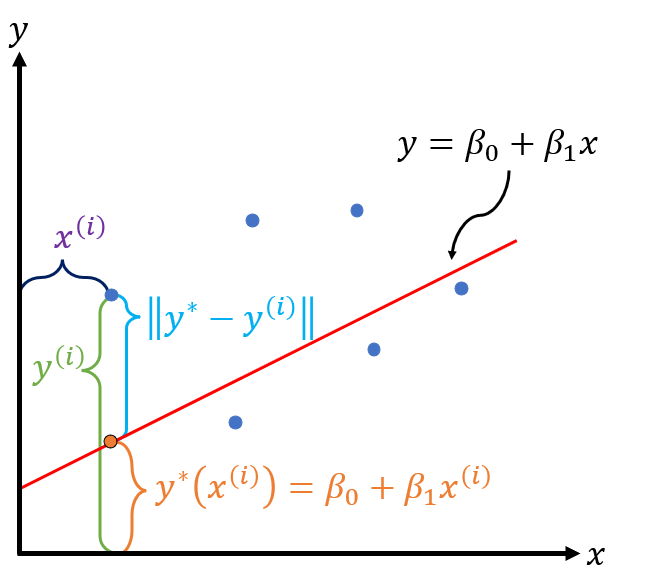


Aquí, $\beta = [\beta_0, \beta_1]^T$. Hay que notar que el problema de optimización anterior se puede reescribir como:

\begin{align*}
  \min_{\beta\in\mathbb{R}^n}\left | \left| y^{(j)}-\left ( β_{0} + \beta_1 x^{(j)} \right)\right| \right|_2^2 .
 \end{align*}


La operación $β_{0} + \beta_1 x^{(j)}$, se puede escribir vectorialmente como:


\begin{align*}
  \beta_{0} + \beta_1 x^{(j)} = [1, x^{(j)}] \beta
\end{align*}

Lo anterior está escrito para la observación $j$. Para incluir a todos los $m$ puntos, se plantea el siguiente sistema de ecuaciones lineales de forma matricial:

\begin{align*}
   \begin{bmatrix}
      β_{0} + \beta_1 x^{(1)}\\
      β_{0} + \beta_1 x^{(2)}\\
      \vdots\\
      β_{0} + \beta_1 x^{(m)}
   \end{bmatrix}
   =
   \begin{bmatrix}
      1 & x^{(1)}\\
      1 &  x^{(2)}\\
      \vdots & \vdots\\
      1 & x^{(m)}
   \end{bmatrix}
   \begin{bmatrix}
    \beta_0\\
    \beta_1
   \end{bmatrix}
\end{align*}

La matriz que acompaña a $\beta$ se nombrará $H$. El problema de optimización se reescribe entonces como :

 \begin{align*}
   \min_{\beta\in\mathbb{R}^n}||y-H\beta||_2^2,
 \end{align*}

donde $y=[y^{(1)}, y^{(2)}, ..., y^{(m)}]^T$.

La solución a este problema se denota $\beta^*=[\beta_0^*,\beta_1^*]^T$, los cuales son los coeficientes que resuelven el problema. El potencial de este método radica en su solución analítica, la cual se puede hallar encontrando su gradiente de la función objetivo e igualándolo a cero. Esta solución es:

\begin{align*}
  \beta^* =  (H^TH)^{-1}H^Ty .
 \end{align*}

Usando el mismo procedimiento, se pueden realizar proceso de regresión para ecuaciones con un grado polinómico más alto, como por ejemplo:

\begin{align*}
   y = g(x;\beta)=\sum_{i=0}^{n} \beta_i x^i
\end{align*}

Si rescribe lo anterior de forma matricial para todos los $m$ puntos, queda:

\begin{align*}
   \begin{bmatrix}
      1 & x^{(1)} & \left(x^{(1)}\right)^2 & \cdots & \left(x^{(1)}\right)^n\\
      1 & x^{(2)} & \left(x^{(2)}\right)^2 & \cdots & \left(x^{(2)}\right)^n\\
      \vdots & \vdots & \vdots & \ddots & \vdots \\
      1 & x^{(m)} & \left(x^{(m)}\right)^2 & \cdots & \left(x^{(m)}\right)^n\\
   \end{bmatrix}
   \begin{bmatrix}
    \beta_0\\
    \beta_1\\
    \vdots\\
    \beta_n
   \end{bmatrix}
\end{align*}

Donde la matriz que acompaña el vector $\beta$ es la nueva matriz $H$, por lo que, al final, la solución analítica se encuentra mediante la misma ecuación mencionada. Cabe resaltar que, con la lógica anterior, es posible encontrar analíticamente los coeficientes para cualquier ecuación deseada, por ejemplo, si se quisiera una combinación de funciones trigonométricas, es decir:

\begin{align*}
  y^*=\beta_0 + \beta_1\cos(x) + \beta_2\sin(x)
\end{align*}

Solo bastaría con modificar la matriz $H$ y solucionar el problema de la misma manera.


# **Contexto del problema**

En el análisis de movimiento humano es importante medir fuerzas, torques y potencias, que permiten evaluar el desgaste metabólico del paciente al realizar algún ejercicio y, también, diseñar de forma eficiente prótesis biónicas para atender sus condiciones particulares de movimiento. Para determinar el valor de estas variables se estima inicialmente la aceleración del cuerpo de estudio a través del análisis de video o con el uso de acelerómetros. En el caso del análisis de video, es usual capturar primero la posición vertical y horizontal del cuerpo para eventualmente estimar la aceleración. Es fundamental que durante la medición de señales de posición, las posiciones estudiadas no varíen rápidamente entre sí para evitar la captura de ruido y obtener mediciones precisas.

# **Descripción de la práctica**

En esta prática se desea construir un modelo de Regresión que permita predecir la trayectoria que sigue el codo al abrir y cerrar una puerta, tal y como se muestra en el siguiente esquema:



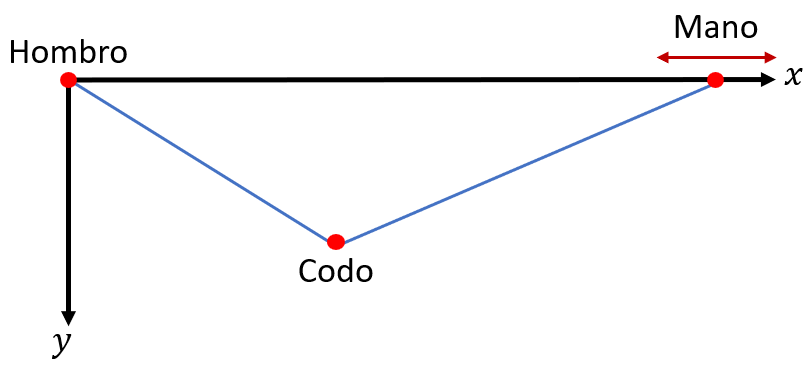

Para efectos de la prática, se definirán las siguientes variables:

- $t$: Tiempo transcurrido
- $x$: Posición horizontal del codo
- $y$: Posición vertical del codo

1. Importe los datos del archivo *regresion.xlsx*, donde la primera columna corresponde al tiempo $(t)$, la segunda a la posición horizontal $(x)$ y la tercera a la vertical $(y)$. Luego, construya los siguientes gráficos de dispersión (scatter):

- Posición vertical en función del tiempo ($t$, $y$)
- Posición vertical en función de la posición horizontal ($x$, $y$)


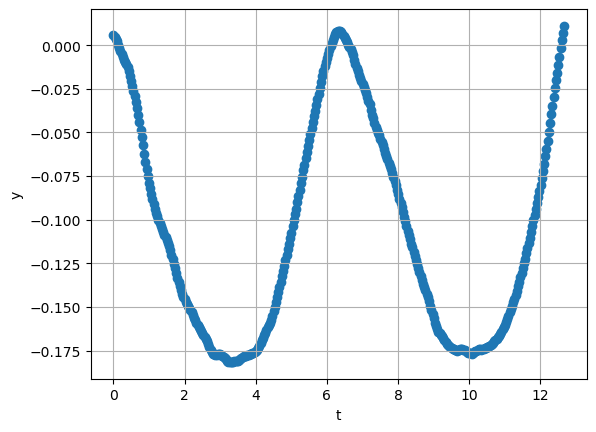

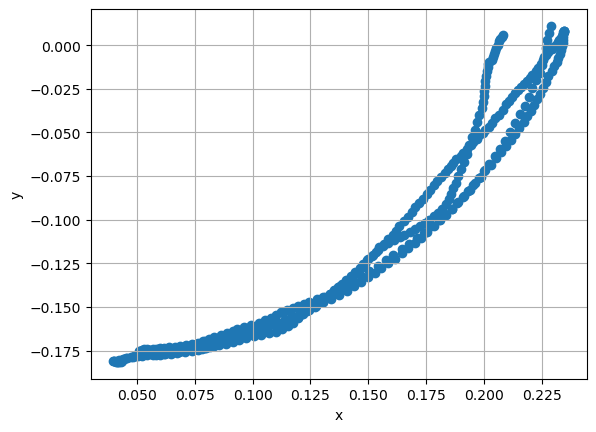

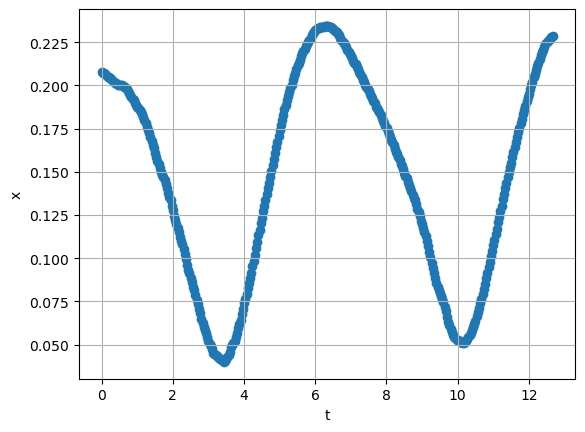

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_excel("regresion.xlsx")

x = data["x"].to_numpy()
y = data["y"].to_numpy()
t = data["t"].to_numpy()

plt.scatter(t, y)
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.show()

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

plt.scatter(t, x)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.show()

2. Implemente una función que reciba como argumentos el grado polinómico $n$ y un arreglo con los datos de la variable independiente, y que retorne la matriz $H$ correspondiente al grado polinómico.

In [15]:
def H_matrix(x,n):
    m = len(x)
    H = np.ones((m,n+1))

    for i in range(m):
        for j in range(n):
            H[i][j+1] = x[i]**(j+1)

    return H

3. Implemente una función que reciba como argumentos la matriz $H$ y el arreglo de valores de la variable dependiente. Esta función debe retornar el arreglo de $\beta^*$.

In [17]:
def beta_sol(y,H):
    return np.linalg.inv(H.T@H)@H.T@y

4. Utilice las funciones que implementó en los puntos anteriores para encontrar los coeficientes óptimos de las siguientes relaciones:

- $y$ vs $t$
- $y$ vs $x$

Con cada uno con los siguientes grados polinómicos:

- Grado 1
- Grado 3
- Grado 5
- Grado 9

In [30]:
# y vs t

solyt_1 = beta_sol(y,H_matrix(t,1))
solyt_3 = beta_sol(y,H_matrix(t,3))
solyt_5 = beta_sol(y,H_matrix(t,5))
solyt_9 = beta_sol(y,H_matrix(t,9))

In [132]:
#y vs x

solxy_1 = beta_sol(y,H_matrix(x,1))
solxy_3 = beta_sol(y,H_matrix(x,3))
solxy_5 = beta_sol(y,H_matrix(x,5))
solxy_9 = beta_sol(y,H_matrix(x,9))

In [52]:
def f(x,beta):
    y_fit = []
    for i in x:
        value = 0
        for j in range(1,len(beta)+1):
            value += beta[j-1]*i**(j-1)
        
        y_fit.append(value)
    
    y_fit = np.array(y_fit)

    return y_fit

5. Teniendo en cuenta los resultados del punto anterior, grafique nuevamente la dispersión inicial de los datos agregando esta vez las curvas obtenidas para cada conjunto de datos. El primer gráfico, debe incluir la dispersión entre la posición vertical $y$ y el tiempo $t$ y las tres curvas de regresión obtenidas para cada grado polinómico en este conjunto de datos. El segundo gráfico debe mostrar las mismas curvas anteriores pero para el conjunto de datos de la posición vertical $y$ y la posición horizontal $x$. Los gráficos esperados deberían tener la siguiente estructura:


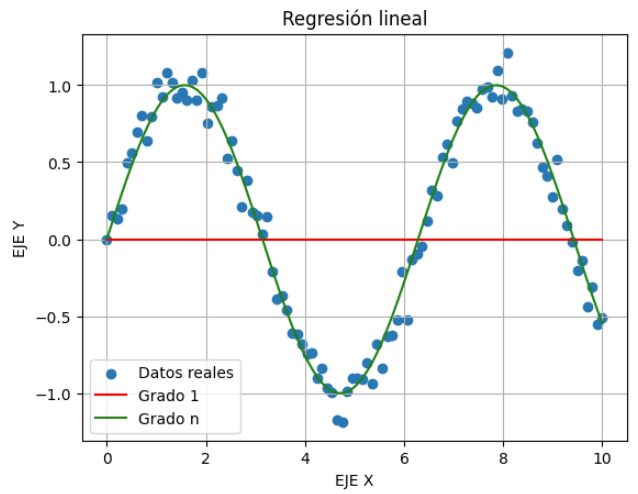

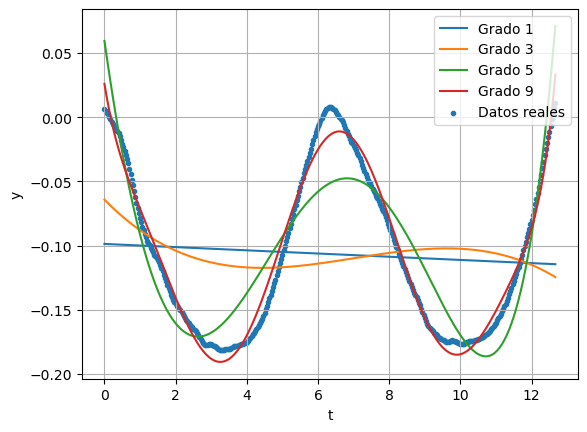

In [ ]:
yt1 = f(t,solyt_1)
yt3 = f(t,solyt_3)
yt5 = f(t,solyt_5)
yt9 = f(t,solyt_9)

plt.plot(t,yt1, label="Grado 1")
plt.plot(t,yt3, label = "Grado 3")
plt.plot(t,yt5, label = "Grado 5")
plt.plot(t,yt9, label = "Grado 9")
plt.scatter(t,y,marker=".", label = "Datos reales")

plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.legend()

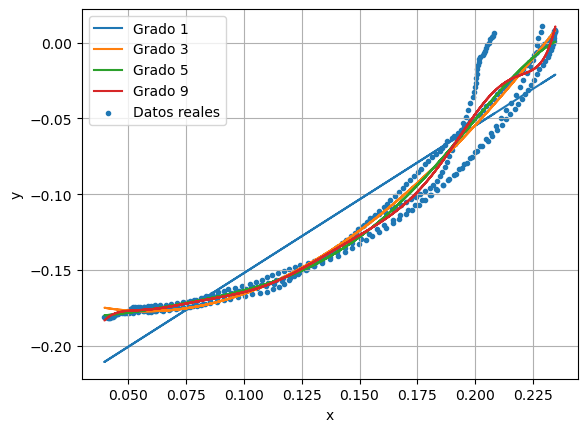

In [137]:
yx1 = f(x,solxy_1)
yx3 = f(x,solxy_3)
yx5 = f(x,solxy_5)
yx9 = f(x,solxy_9)

plt.plot(x,yx1, label="Grado 1")
plt.plot(x,yx3, label = "Grado 3")
plt.plot(x,yx5, label = "Grado 5")
plt.plot(x,yx9, label = "Grado 9")
plt.scatter(x,y,marker=".", label = "Datos reales")

plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()

6. Note que el conjunto de datos de la posición vertical en función del tiempo tiene un comportamiento oscilatorio. Implemente una función que reciba como argumento el arreglo de datos asociados a la variable independiente y que retorne la matriz $H$ que satisfaga la relación:

\begin{align*}
  y^*=\beta_0 + \beta_1\sin(t) + \beta_2\cos(t)
\end{align*}

In [100]:
def H_new(t, n):
    H = [np.ones_like(t)]
    for i in range(1, n + 1):
        H.append(np.sin(n*t))
        H.append(np.cos(n*t))
    return np.column_stack(H)

In [102]:
H_new(t,1)

array([[1.        , 0.        , 1.        ],
       [1.        , 0.03332716, 0.9994445 ],
       [1.        , 0.0666173 , 0.9977786 ],
       ...,
       [1.        , 0.03529206, 0.99937704],
       [1.        , 0.06857552, 0.99764593],
       [1.        , 0.10178282, 0.99480664]])

7. Calcule los parámetros óptimos $\beta^*$ que ajustan el conjunto de datos ($t, y$) a la relación trigonométrica anterior.

In [106]:
beta_sol(y,H_new(t,1))

array([-0.10754661,  0.02470798,  0.08024588])

8. Grafique la dispersión inicial de la posición vertical $y$ en función del tiempo $t$ agregando la regresión polinómica de grado 9 calculada previamente y la regresión trigonométrica que acaba de obtener.

In [ ]:
def f_new(t, beta, n):
    t = np.asarray(t)
    y_fit = beta[0] * np.ones(len(t))

    for i in range(1, n + 1):
        y_fit += beta[2*i - 1] * np.sin(i * t) + beta[2*i] * np.cos(i * t)
         
    return y_fit

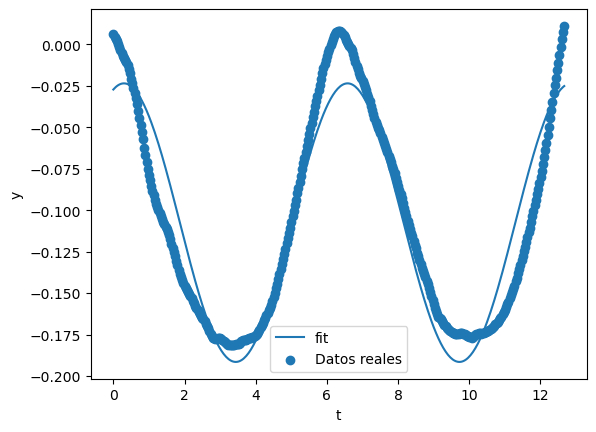

In [131]:
yt_new = f_new(t,beta_sol(y,H_new(t,1)),1)

plt.plot(t,yt_new, label="fit")
plt.scatter(t,y,label="Datos reales")

plt.ylabel("y")
plt.xlabel("t")
plt.legend()

9. Implemente una función que calcule el error cuadrático medio (MSE) entre los valores $y$ medidos y las predicciones que se obtienen usando la regresión polinómica (grados 1,3,5 y 9) y trigonométrica para el conjunto de datos ($t, y$). Imprima de forma adecuada estos valores.

In [122]:
def MSE(y_fit, y0):
    return (1/len(y0))*np.sum( (y_fit - y0)**2 )

In [125]:
print(MSE(yt1,y), MSE(yt3,y), MSE(yt5,y),MSE(yt9,y))

0.003928129565717373 0.0038246490210486627 0.0007098524753949098 8.231380766794386e-05


In [128]:
print(MSE(yt_new, y))

0.0003921265015428163


In [138]:
print(MSE(yx1,y), MSE(yx3,y), MSE(yx5,y),MSE(yx9,y))

0.00042896027178004214 0.0001396041909360571 0.00012936692522252393 0.00011915539451096984


10. Teniendo el cuenta los valores de la función objetivo, responda:

- Para el gráfico de $y$ vs $t$, ¿cuál grado fue mejor?
- Para el gráfico de $y$ vs $x$, ¿cuál grado fue mejor?
- ¿Qué diferencias encuentra en los resultados de regresión para el conjunto de datos ($t$,$y$) en comparación con el conjunto ($x$,$y$)?
- ¿Considera que la regresión con funciones trigonométricas tuvo mejores o peores resultados que la regresión polinómica?
- Aumente el grado polinómico por encima de 10 y analice los resultados para ambos conjuntos de datos, $(t,y)$ y $(x,y)$. ¿Cree que aumentar el grado polinómico hará que el error tienda a cero?

La regresión polinómica tuvo mejor resultado que la regresión trigonométrica, específicamente en el grado 9.

In [ ]:
#Aumentando el grado polinomico plano ty:

for i in range(9,30):
    y_fit = f(t,beta_sol(y,H_matrix(t,i)))
    print("MSE Polinomio grado {0}: {1}".format(i, MSE(y_fit,y)))

MSE Polinomio grado 9: 8.231380766794386e-05
MSE Polinomio grado 10: 2.636606753034831e-05
MSE Polinomio grado 11: 5.7324863399044265e-05
MSE Polinomio grado 12: 0.029991111908994464
MSE Polinomio grado 13: 0.01305705194215231
MSE Polinomio grado 14: 0.06255019111493464
MSE Polinomio grado 15: 1.1500561816074282
MSE Polinomio grado 16: 0.11970617330659451
MSE Polinomio grado 17: 4.4227882022436535
MSE Polinomio grado 18: 2.2562386749845125
MSE Polinomio grado 19: 179.07532673008586
MSE Polinomio grado 20: 10.791111566955305
MSE Polinomio grado 21: 85.0681029614923
MSE Polinomio grado 22: 3.3037548259952265
MSE Polinomio grado 23: 66.5815694773213
MSE Polinomio grado 24: 560.6873470898217
MSE Polinomio grado 25: 6573.211339361604
MSE Polinomio grado 26: 30394.11337767446
MSE Polinomio grado 27: 2742.6113315231646
MSE Polinomio grado 28: 6406.109374533624
MSE Polinomio grado 29: 2499.2527916012837


In [ ]:
#Aumentando el grado polinomico plano xy:

for i in range(9,30):
    y_fit = f(x,beta_sol(y,H_matrix(x,i)))
    print("MSE Polinomio grado {0}: {1}".format(i, MSE(y_fit,y)))

MSE Polinomio grado 9: 0.00011915539451096984
MSE Polinomio grado 10: 0.00013905331287241205
MSE Polinomio grado 11: 0.0001223664687540556
MSE Polinomio grado 12: 0.00011956902652879796
MSE Polinomio grado 13: 0.000134787384069647
MSE Polinomio grado 14: 0.0001120102105067371
MSE Polinomio grado 15: 0.00011084954063097268
MSE Polinomio grado 16: 0.00011831189769380988
MSE Polinomio grado 17: 0.0001432667394637297
MSE Polinomio grado 18: 0.00012052331581319778
MSE Polinomio grado 19: 0.000113705248160708
MSE Polinomio grado 20: 0.0002472924757770532
MSE Polinomio grado 21: 0.00011292398556299549
MSE Polinomio grado 22: 0.00011566112788326397
MSE Polinomio grado 23: 0.00016871039389390965
MSE Polinomio grado 24: 0.0001361350243974687
MSE Polinomio grado 25: 0.00037596978409538826
MSE Polinomio grado 26: 0.00040194467794947
MSE Polinomio grado 27: 0.0009713257890897856
MSE Polinomio grado 28: 0.00013020113060204316
MSE Polinomio grado 29: 0.049687118777867696
